In [1]:
!pip install opencv-python

In [2]:
from google.colab.patches import cv2_imshow

In [3]:
import numpy as np
import cv2
import time

In [4]:
def computeMse(img1, img2):
    height, width, _ = img1.shape
    sum = 0.0
    for i in range(0, height):
        for j in range(0, width):
            difference = (img1[i, j] - img2[i, j])
            sum += difference ** 2
    mse = sum / (width * height)
    return mse

###Grayscale

In [5]:
def grayScaleAverage(img):
    height, width, depth = img.shape
    size = height, width, depth
    img_average = np.zeros(size, dtype=np.uint8)
    for i in range(0, height):
        for j in range(0, width):
            average = np.average(img[i,j])
            img_average[i,j] = average
    cv2_imshow(img_average)
    return img_average

In [6]:
def grayScaleCoeff(img):
    height, width, depth = img.shape
    size = height, width, depth
    img_coeff = np.zeros(size, dtype=np.uint8)
    for i in range(0, height):
        for j in range(0, width):
            pixel = img[i, j][2] * 0.299 + img[i, j][1] * 0.587 + img[i, j][0] * 0.114
            img_coeff[i, j] = pixel
    cv2_imshow(img_coeff)
    cv2.waitKey(0)
    return img_coeff

In [7]:
def grayScaleCV(img):
    img_cv = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2_imshow(img_cv)
    return img_cv

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


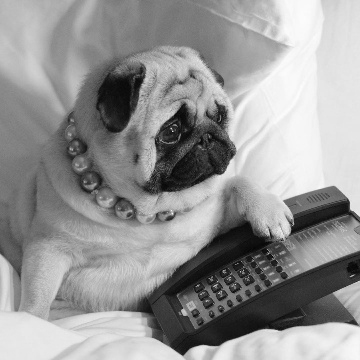

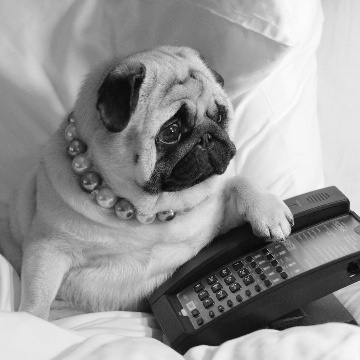

mean squared error =  [0.50273148 0.50273148 0.50273148]


In [9]:
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/r56RK9bCGiY.jpg')
print("mean squared error = ", computeMse(grayScaleCoeff(img), grayScaleCV(img)))

###Brightness

In [10]:
def brightness(img, brightness):
    height, width, _ = img.shape  
    for x in range(0, height):
      for y in range (0, width):
        (b, g, r) = img[x, y]
        red = int(r + brightness)
        green = int(g + brightness)
        blue = int(b + brightness)
          
        red = min(255, max(0, red))
        green = min(255, max(0, green))
        blue = min(255, max(0, blue))

        img[x, y][:] = (blue, green, red)

    cv2_imshow(img)
    return img

In [11]:
def brightnessHsv(img, brightness):
    height, width, _ = img.shape
    for x in range(0, height):
        for y in range(0, width):
            V = img[x, y][2]

            V = max(0, min(V + brightness, 255))

            img[x, y][2] = V
    cv2_imshow(img)
    return img

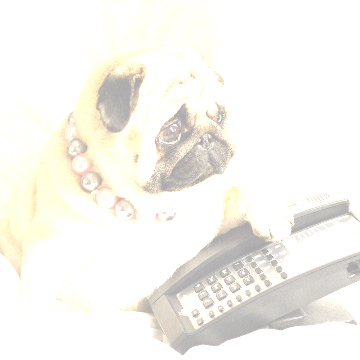

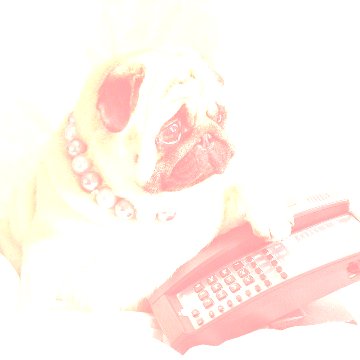

[0. 0. 0.]


In [12]:
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/r56RK9bCGiY.jpg')
print(computeMse((brightness(img, 160)), brightnessHsv(img, 160)))

In [13]:
def convertToHsvAndBackCV(img):
    cv2_imshow(img)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    cv2_imshow(img_hsv)
    
    img_rgb = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
    cv2_imshow(img_rgb)
    return img_hsv, img_rgb

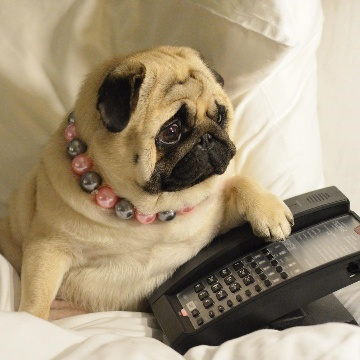

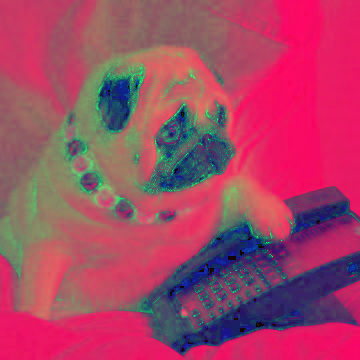

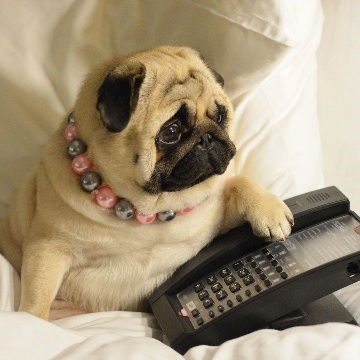

In [14]:
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/r56RK9bCGiY.jpg')
img_hsv_cv, img_rgb_cv = convertToHsvAndBackCV(img)

In [15]:
def myHsvToRgbAndBack(img):
    # channel1 - H
    # channel2 - S
    # channel3 - V
    cv2_imshow(img)
    height, width, depth = img.shape
    size = height, width, depth
    img_hsv = np.zeros(size, dtype=np.uint8)
    
    for x in range(width):
        for y in range(height):
            R = img[x, y][0]
            G = img[x, y][1]
            B = img[x, y][2]
            R = R / 255
            G = G / 255
            B = B / 255
            Cmax = np.maximum(np.maximum(R, G), B)
            Cmin = np.minimum(np.minimum(R, G), B)
           
            if  (Cmax - Cmin) == 0:
                channel1 = 0
            elif Cmax == R:
                channel1 = 60 * (((G - B) /  (Cmax - Cmin)) % 6)
            elif Cmax == G:
                channel1 =  60 * ((B - R) /  (Cmax - Cmin) + 2)
            elif Cmax == B:
                channel1 = 60 * ((R - G) /  (Cmax - Cmin) + 4)

            if Cmax == 0:
              channel2 = 0
            else:
              channel2 = (1 - Cmin/Cmax)

            channel3 = Cmax

            channel1 = round(channel1 / 360 * 255)
            channel2 = round(channel2 * 255)
            channel3 = round(channel3 * 255)

            img_hsv[x, y][:] = (channel1, channel2, channel3)
    cv2_imshow(img_hsv)
    img_rgb = np.zeros(size, dtype=np.uint8)
    for x in range(width):
        for y in range(height):
            channel1 = img_hsv[x, y][0] / 255 * 360
            channel2 = img_hsv[x, y][1] / 255
            channel3 = img_hsv[x, y][2] / 255

            C = channel3 * channel2
            X = C * (1 - abs((channel1 / 60) % 2 - 1))
            m = channel3 - C

            if 0 <= channel1 < 60:
                r, g, b = C, X, 0
            elif 60 <= channel1 < 120:
                r, g, b = X, C, 0
            elif 120 <= channel1 < 180:
                r, g, b = 0, C, X
            elif 180 <= channel1 < 240:
                r, g, b = 0, X, C
            elif 240 <= channel1 < 300:
                r, g, b = X, 0, C
            elif 300 <= channel1 <= 360:
                r, g, b = C, 0, X
            r = (r + m) * 255
            g = (g + m) * 255
            b = (b + m) * 255
            img_rgb[x, y][:] = (r, g, b)
    cv2_imshow(img_rgb)
    print("Diff: ", computeMse(img, img_rgb))
    return img_hsv, img_rgb

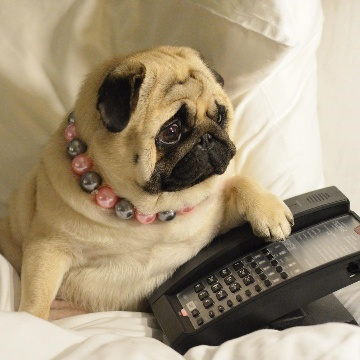

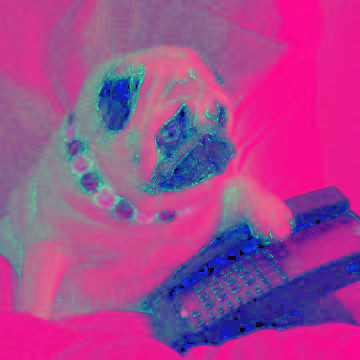

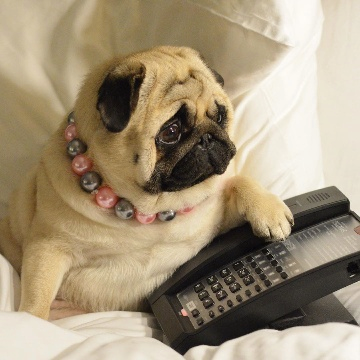

Diff:  [0.47141975 0.46685185 0.03840278]


In [16]:
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/r56RK9bCGiY.jpg')
img_hsv_my, img_rgb_my = myHsvToRgbAndBack(img)

In [17]:
def compareTime(img):
    start_brightness_rgb = time.time()
    brightness(img, 160)
    end_brightness_rgb = time.time()
    time_brightness_rgb = end_brightness_rgb - start_brightness_rgb
    print("Runtime of filter brightness  RGB : ",time_brightness_rgb)
    start_brightness_hsv = time.time()
    brightnessHsv(img, 160)
    end_brightness_hsv = time.time()
    time_brightness_hsv = end_brightness_hsv - start_brightness_hsv
    print("Runtime of filter brightness  HSV : ",time_brightness_hsv)
    if time_brightness_hsv > time_brightness_rgb:
      timeСomparison = time_brightness_hsv - time_brightness_rgb
      print("The RGB filter is faster by : ", timeСomparison)
    else :
      timeСomparison = time_brightness_rgb -  time_brightness_hsv
      print("The HSV filter is faster by : ", timeСomparison)
  


Comparing performance our implementation of the transition HSV and open cv using metric :  [1.59160424e+02 1.15277778e-02 0.00000000e+00]
Comparing performance our implementation of the transition RGB and open cv using metric:  [0.03533179 0.55811728 0.03647377]


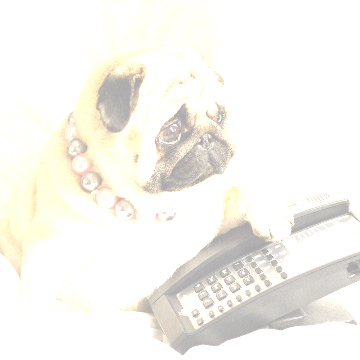

Runtime of filter brightness  RGB :  1.4307620525360107


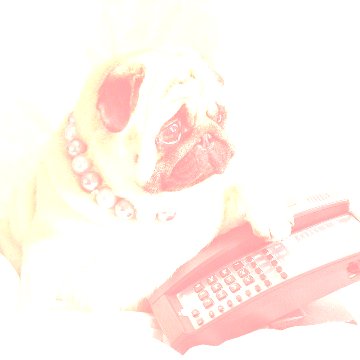

Runtime of filter brightness  HSV :  0.5232703685760498
The HSV filter is faster by :  0.9074916839599609


In [25]:
print("Comparing performance our implementation of the transition HSV and open cv using metric : ", computeMse(img_hsv_cv, img_hsv_my))
print("Comparing performance our implementation of the transition RGB and open cv using metric: ", computeMse(img_rgb_cv, img_rgb_my))
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/r56RK9bCGiY.jpg')
compareTime(img)